In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery as bq

%matplotlib inline

In [2]:
hormone_meth_bigtable = pd.read_table("./datasets/hormone_meth_bigtable.HM450.tsv", sep="\t")
print(hormone_meth_bigtable.shape)
hormone_meth_bigtable.head()

/home/singuyen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(625379, 18)


,case_barcode,sample_barcode,aliquot_barcode,probe_id,beta_value,sample_type,sample_type_name,initial_response,recurrence_status,recurrence_log,subtype,ER,PR,Her2_IHC,Her2_ISH,Her2,triple_negative,subtype_sub
0,TCGA-D8-A27V,TCGA-D8-A27V-01A,TCGA-D8-A27V-01A-12D-A17F-05,cg22251148,0.90,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ...",LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
1,TCGA-D8-A27V,TCGA-D8-A27V-01A,TCGA-D8-A27V-01A-12D-A17F-05,cg07658280,0.95,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ...",LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
2,TCGA-D8-A27V,TCGA-D8-A27V-01A,TCGA-D8-A27V-01A-12D-A17F-05,cg03955927,0.93,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ...",LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
3,TCGA-D8-A27V,TCGA-D8-A27V-01A,TCGA-D8-A27V-01A-12D-A17F-05,cg12756504,0.88,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ...",LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA
4,TCGA-D8-A27V,TCGA-D8-A27V-01A,TCGA-D8-A27V-01A-12D-A17F-05,cg23657179,0.87,1,Primary solid Tumor,Unknown,Unknown,"Alive tumor free, last follow-up within risky ...",LumA,Positive,Positive,1+,NaN,NaN,NaN,LumA


In [3]:
print("Sample types")
print(hormone_meth_bigtable.drop_duplicates(subset="sample_barcode").sample_type_name.value_counts())
print("\n")

print("Cases - Initial responses")
print(hormone_meth_bigtable.drop_duplicates(subset="case_barcode").initial_response.value_counts())
print("\n")

print("Cases - Recurrence status")
print(hormone_meth_bigtable.drop_duplicates(subset="case_barcode").recurrence_status.value_counts())
print("\n")

print("Cases - Recurrence log")
print(hormone_meth_bigtable.drop_duplicates(subset="case_barcode").recurrence_log.value_counts())
print("\n")

Sample types
Primary solid Tumor    353
Solid Tissue Normal     35
Name: sample_type_name, dtype: int64


Cases - Initial responses
Unknown               313
Complete response      34
Progressive/Stable      7
Name: initial_response, dtype: int64


Cases - Recurrence status
Unknown     312
Occured      30
Low risk      7
Name: recurrence_status, dtype: int64


Cases - Recurrence log
Alive tumor free, last follow-up within risky period             279
New tumor after/during treatment                                  21
Drug start and end dates unknown                                  14
Dead with tumor                                                    9
Unknown neoplasm status                                            9
Alive tumor free after risky period                                7
Dead tumor free during risky period                                5
Reported having tumor during follow-up but unknown recurrence      3
Alive tumor free but unknown follow-up date                   

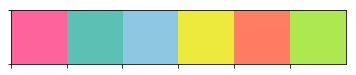

In [4]:
sns.palplot(sns.color_palette(["#ff639c", "#5bc1b5", "#8cc8e2", "#edea3d", "#ff7e63", "#aee851"]))

In [5]:
hormone_meth_bigtable.drop_duplicates(subset="aliquot_barcode")['sample_type_name'].unique()

array(['Primary solid Tumor', 'Solid Tissue Normal'], dtype=object)

In [6]:
hormone_meth_bigtable.drop_duplicates(subset="aliquot_barcode")['initial_response'].unique()

array(['Unknown', 'Progressive/Stable', 'Complete response'], dtype=object)

In [7]:
hormone_meth_bigtable.drop_duplicates(subset="aliquot_barcode")['recurrence_status'].unique()

array(['Unknown', 'Occured', nan, 'Low risk'], dtype=object)

# Include normal
## Initial response

In [8]:
init_res = hormone_meth_bigtable.loc[hormone_meth_bigtable['initial_response'] != 'Unknown']
meth_matrix = init_res.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 46)


aliquot_barcode,TCGA-A2-A0CO-01A-13D-A22B-05,TCGA-A2-A0CR-01A-11D-A22B-05,TCGA-A2-A0EP-01A-52D-A230-05,TCGA-A2-A3Y0-01A-11D-A23D-05,TCGA-A7-A3RF-01A-11D-A22B-05,TCGA-A7-A5ZX-01A-12D-A29O-05,TCGA-A8-A08O-01A-21D-A10P-05,TCGA-A8-A0A6-01A-12D-A10P-05,TCGA-AC-A23G-01A-11D-A212-05,TCGA-AC-A2FB-01A-11D-A17F-05,...,TCGA-GM-A3XG-01A-31D-A244-05,TCGA-GM-A3XN-01A-12D-A230-05,TCGA-GM-A5PX-01A-12D-A28C-05,TCGA-LL-A50Y-01A-11D-A268-05,TCGA-LL-A73Z-01A-11D-A32T-05,TCGA-OL-A5S0-01A-11D-A28C-05,TCGA-S3-A6ZG-01A-22D-A32T-05,TCGA-S3-AA11-01A-31D-A41Q-05,TCGA-V7-A7HQ-01A-11D-A33F-05,TCGA-WT-AB41-01A-11D-A41Q-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.31,0.32,0.34,0.28,0.16,0.30,0.29,0.41,0.31,0.36,...,0.18,0.42,0.36,0.36,0.32,0.42,0.65,0.65,0.50,0.65
cg00008036,0.28,0.26,0.23,0.10,0.42,0.32,0.08,0.47,0.19,0.30,...,0.20,0.36,0.15,0.18,0.09,0.10,0.31,0.52,0.11,0.25
cg00024494,0.44,0.54,0.44,0.23,0.87,0.88,0.85,0.45,0.73,0.52,...,0.84,0.69,0.68,0.84,0.62,0.50,0.60,0.91,0.90,0.72
cg00035316,0.69,0.40,0.28,0.10,0.79,0.64,0.71,0.52,0.48,0.43,...,0.38,0.44,0.54,0.76,0.44,0.32,0.64,0.78,0.27,0.62
cg00040588,0.57,0.36,0.35,0.32,0.50,0.47,0.37,0.53,0.42,0.35,...,0.56,0.40,0.33,0.18,0.78,0.29,0.71,0.50,0.25,0.51


In [9]:
color_matrix = pd.DataFrame()
df = init_res.drop_duplicates(subset="aliquot_barcode")

print(print(df['sample_type_name'].unique()))
print(df['initial_response'].unique())

['Primary solid Tumor' 'Solid Tissue Normal']
None
['Progressive/Stable' 'Complete response']


In [10]:
c = dict(zip(df['sample_type_name'].unique(), ["#ff639c", "#5bc1b5"]))
color_matrix['Sample types'] = df['sample_type_name'].map(c)

c = dict(zip(df['initial_response'].unique(), ["#edea3d", "#8cc8e2"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Sample types,Initial response
aliquot_barcode,,
TCGA-A8-A08O-01A-21D-A10P-05,#ff639c,#edea3d
TCGA-AC-A2FF-01A-11D-A17F-05,#ff639c,#8cc8e2
TCGA-WT-AB41-01A-11D-A41Q-05,#ff639c,#8cc8e2
TCGA-S3-AA11-01A-31D-A41Q-05,#ff639c,#8cc8e2
TCGA-A8-A0A6-01A-12D-A10P-05,#ff639c,#8cc8e2


In [11]:
distance = scipy.spatial.distance.squareform(1-meth_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

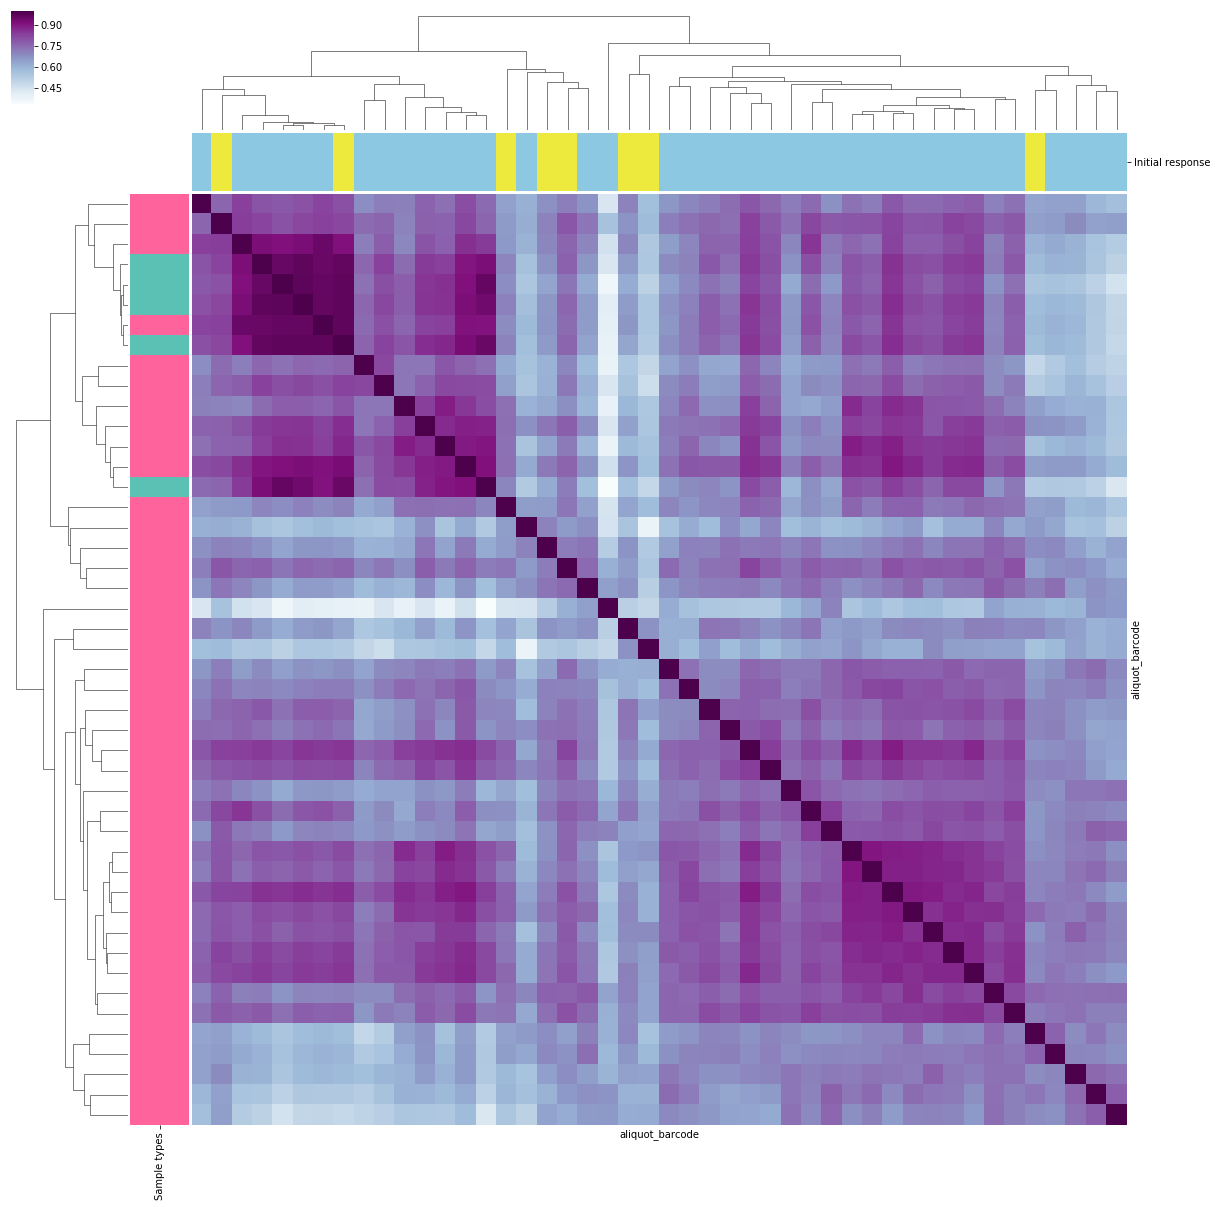

In [12]:
g = sns.clustermap(data=meth_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix['Sample types'], col_colors = color_matrix.iloc[:,1:],
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

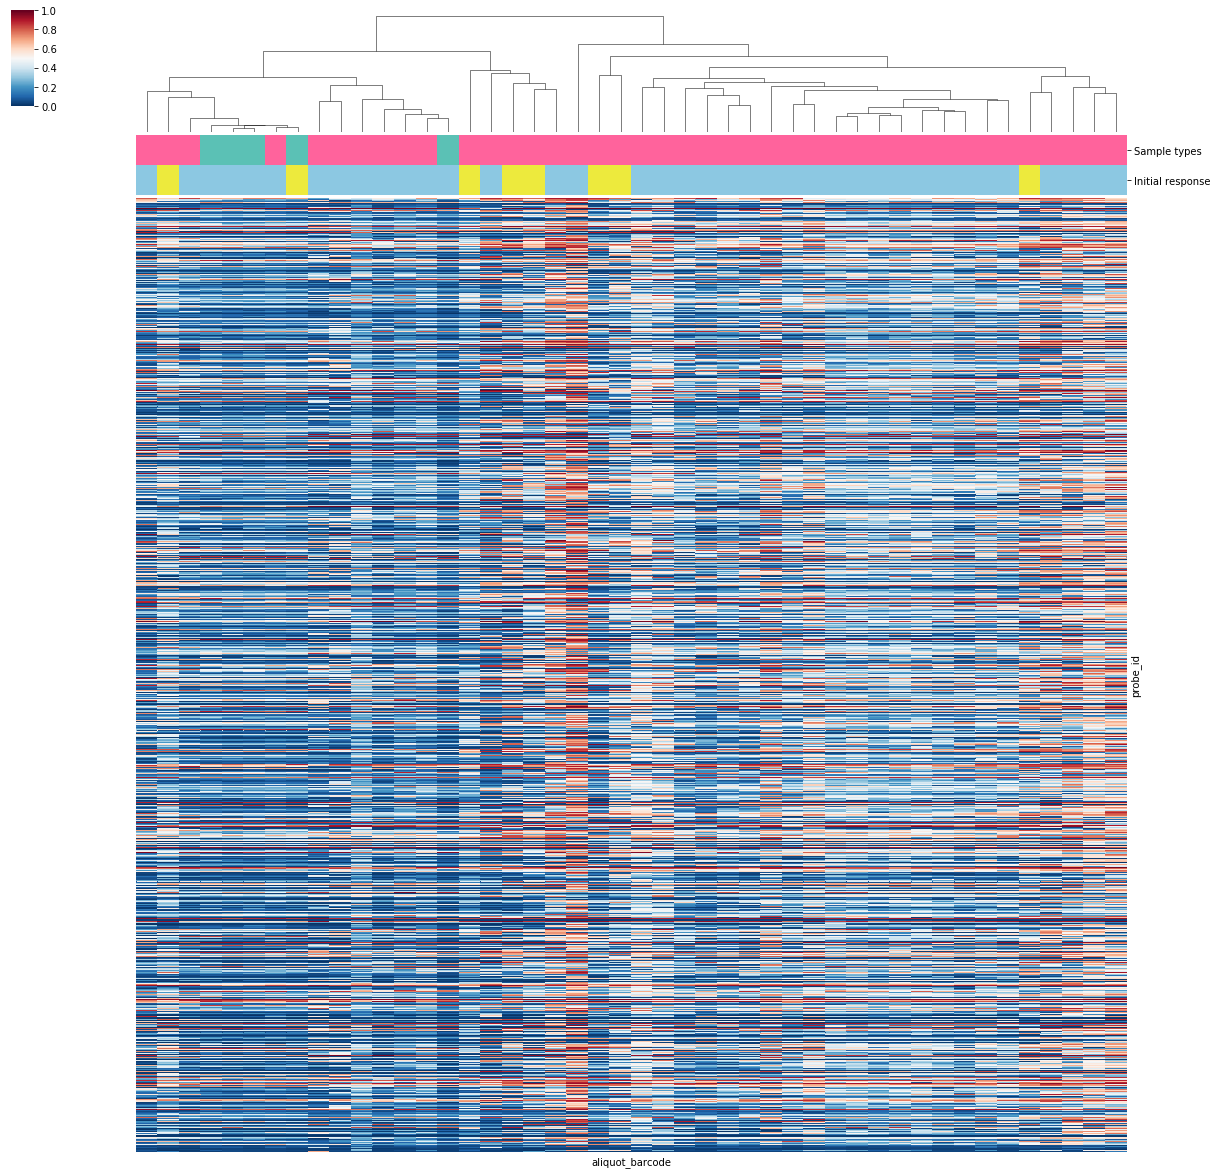

In [13]:
g1 = sns.clustermap(data=meth_matrix, col_linkage=linkage, row_cluster = False,
                   col_colors = color_matrix,
                   cmap="RdBu_r", vmin=0, vmax=1, figsize=(20,21), 
                   xticklabels=False, yticklabels=False)

In [14]:
g.savefig("./plots/cluster_meth.hormone.init_res.corrdata.png")
g1.savefig("./plots/cluster_meth.hormone.init_res.methdata.png")

## Recurrence status

In [15]:
recur = hormone_meth_bigtable.loc[(hormone_meth_bigtable['recurrence_status'] != 'Unknown') & 
                                     (hormone_meth_bigtable['recurrence_status'].isna() == False)]
meth_matrix = recur.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 42)


aliquot_barcode,TCGA-A2-A0CK-01A-11D-A22B-05,TCGA-A2-A0SV-01A-11D-A10P-05,TCGA-A2-A0SW-01A-11D-A10P-05,TCGA-A2-A0YC-01A-11D-A10A-05,TCGA-A2-A25B-01A-11D-A16A-05,TCGA-A2-A25E-01A-11D-A16A-05,TCGA-A7-A13E-01A-11D-A12R-05,TCGA-A7-A13E-11A-61D-A12R-05,TCGA-A7-A13G-01A-11D-A13K-05,TCGA-A7-A13G-01B-04D-A22R-05,...,TCGA-E9-A1NF-01A-11D-A14H-05,TCGA-E9-A1NF-11A-73D-A14H-05,TCGA-EW-A1P0-01A-11D-A145-05,TCGA-GM-A2D9-01A-11D-A18O-05,TCGA-GM-A2DA-01A-11D-A18O-05,TCGA-GM-A2DC-01A-11D-A18O-05,TCGA-GM-A2DM-01A-11D-A17Z-05,TCGA-GM-A2DN-01A-11D-A17Z-05,TCGA-LL-A73Z-01A-11D-A32T-05,TCGA-LQ-A4E4-01A-11D-A268-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.45,0.16,0.18,0.56,0.46,0.59,0.49,0.21,0.51,0.51,...,0.21,0.23,0.58,0.46,0.22,0.68,0.19,0.40,0.32,0.71
cg00008036,0.35,0.23,0.25,0.37,0.37,0.18,0.16,0.09,0.13,0.11,...,0.37,0.12,0.48,0.32,0.14,0.35,0.11,0.46,0.09,0.14
cg00024494,0.76,0.63,0.50,0.71,0.88,0.83,0.78,0.57,0.89,0.88,...,0.86,0.62,0.56,0.84,0.70,0.84,0.81,0.53,0.62,0.90
cg00035316,0.71,0.59,0.50,0.44,0.76,0.35,0.82,0.17,0.63,0.56,...,0.67,0.20,0.83,0.71,0.48,0.75,0.67,0.40,0.44,0.87
cg00040588,0.30,0.33,0.23,0.52,0.27,0.33,0.22,0.46,0.19,0.19,...,0.45,0.40,0.14,0.63,0.24,0.26,0.43,0.34,0.78,0.27


In [16]:
color_matrix = pd.DataFrame()
df = recur.drop_duplicates(subset="aliquot_barcode")

print(print(df['sample_type_name'].unique()))
print(df['recurrence_status'].unique())

['Primary solid Tumor' 'Solid Tissue Normal']
None
['Occured' 'Low risk']


In [17]:
c = dict(zip(df['sample_type_name'].unique(), ["#ff639c", "#5bc1b5"]))
color_matrix['Sample types'] = df['sample_type_name'].map(c)

c = dict(zip(df['recurrence_status'].unique(), ["#ff7e63", "#aee851"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Sample types,Recurrence status
aliquot_barcode,,
TCGA-A8-A08O-01A-21D-A10P-05,#ff639c,#ff7e63
TCGA-A2-A0YC-01A-11D-A10A-05,#ff639c,#ff7e63
TCGA-A7-A13E-01A-11D-A12R-05,#ff639c,#ff7e63
TCGA-A7-A13G-01A-11D-A13K-05,#ff639c,#ff7e63
TCGA-GM-A2DC-01A-11D-A18O-05,#ff639c,#aee851


In [18]:
distance = scipy.spatial.distance.squareform(1-meth_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

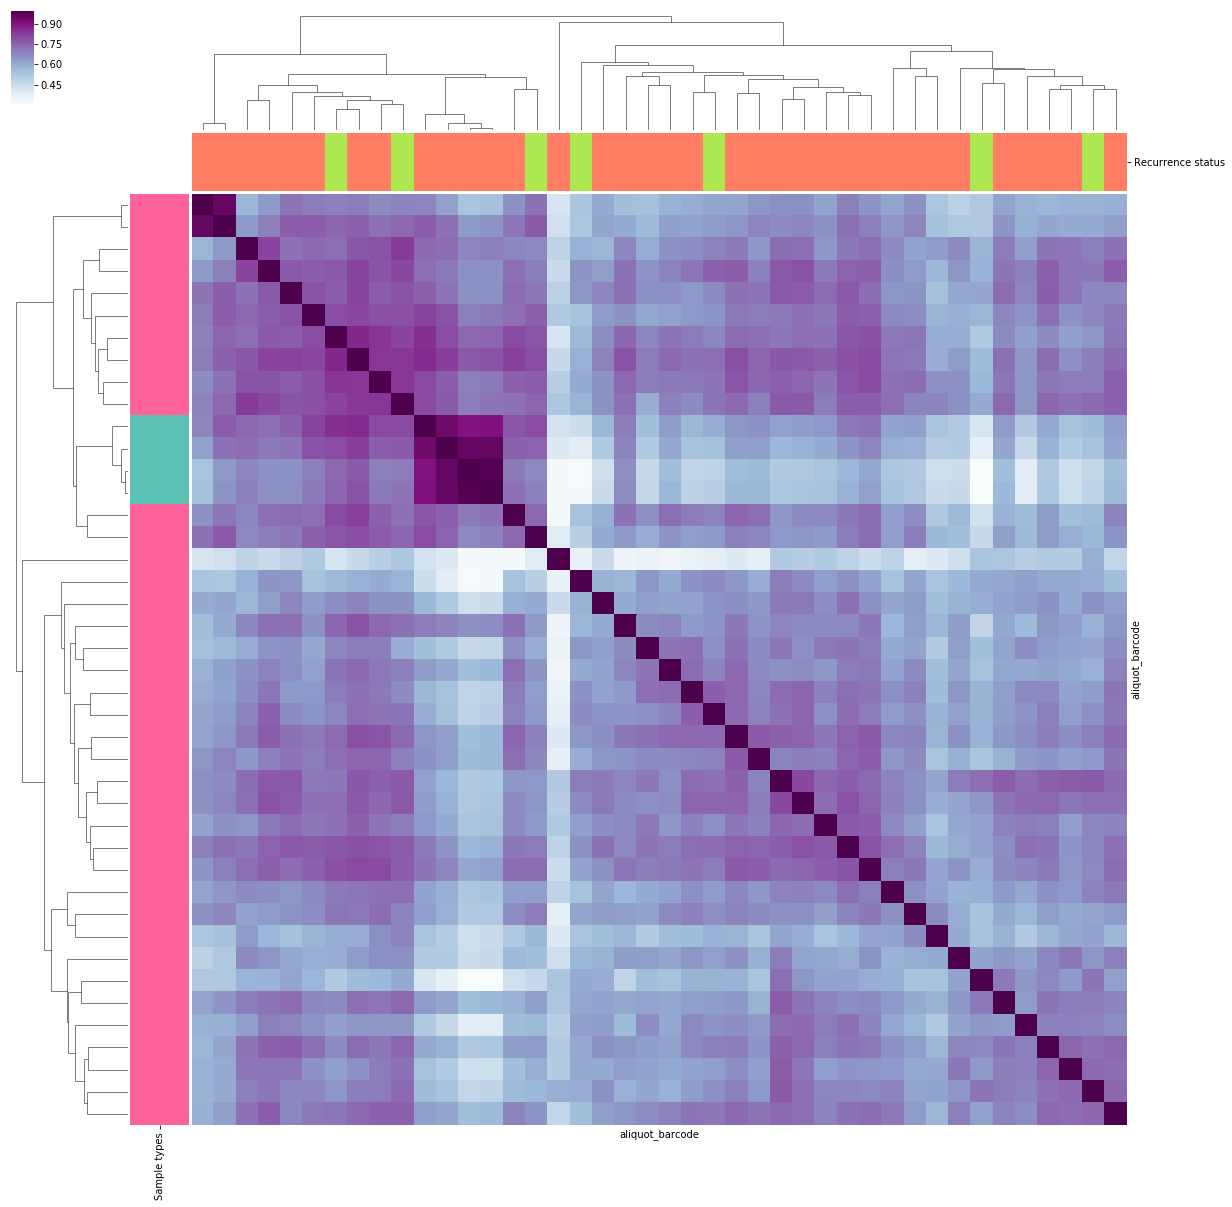

In [19]:
g2 = sns.clustermap(data=meth_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix['Sample types'], col_colors = color_matrix.iloc[:,1:],
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

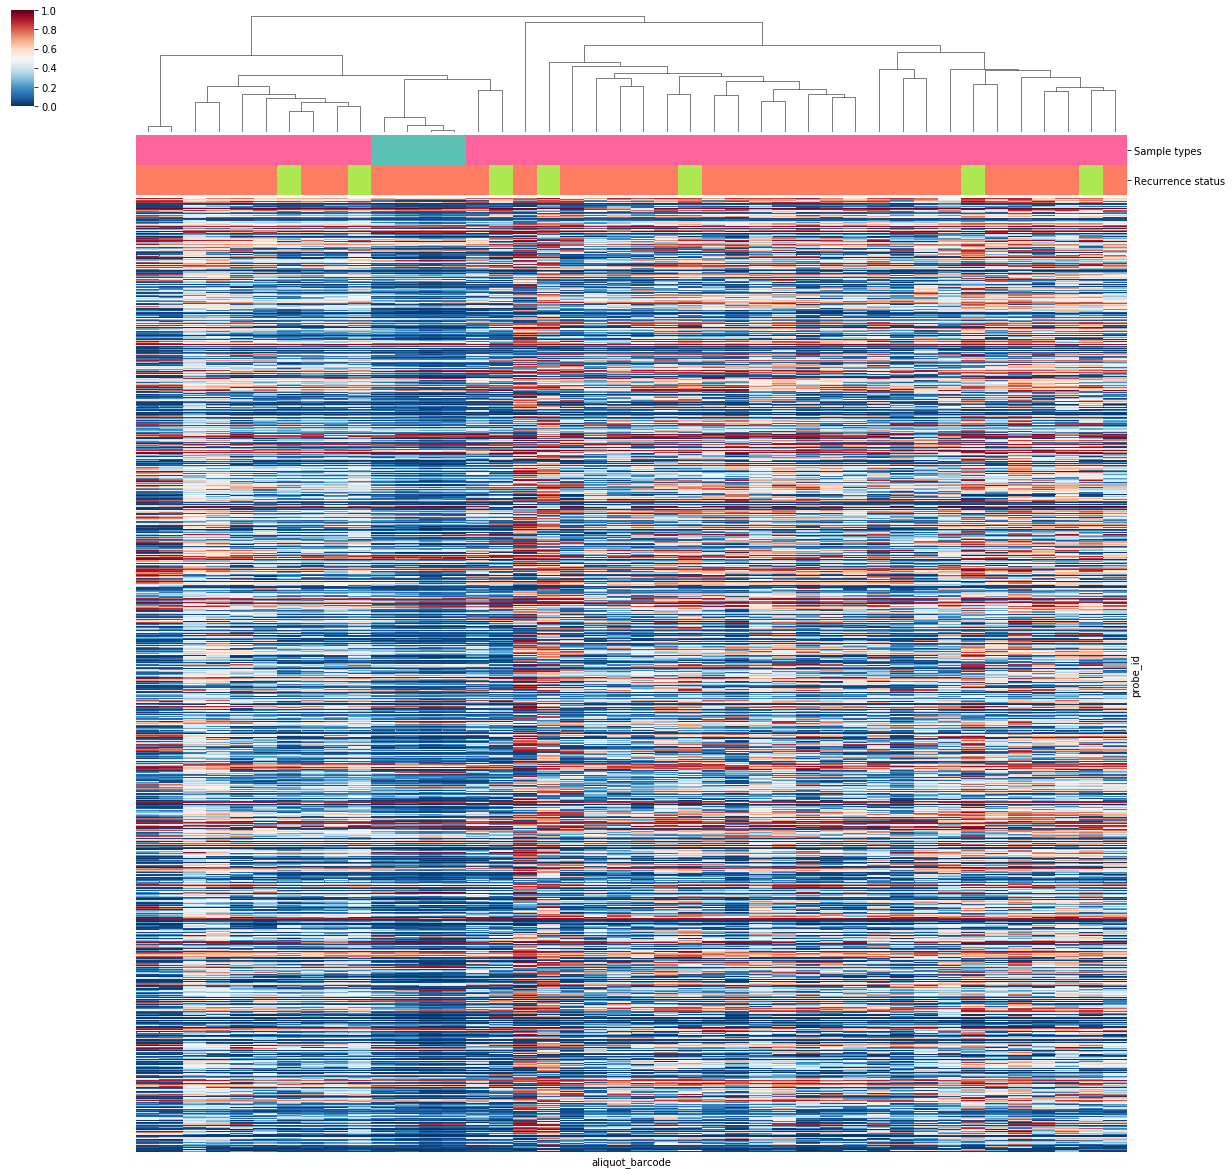

In [20]:
g3 = sns.clustermap(data=meth_matrix, col_linkage=linkage, row_cluster = False,
                   col_colors = color_matrix,
                   cmap="RdBu_r", vmin=0, vmax=1, figsize=(20,21), 
                   xticklabels=False, yticklabels=False)

In [21]:
g2.savefig("./plots/cluster_meth.hormone.recur.corrdata.png")
g3.savefig("./plots/cluster_meth.hormone.recur.methdata.png")

# Exclude normal
## Initial response

In [8]:
init_res = hormone_meth_bigtable.loc[(hormone_meth_bigtable['sample_type'] == 1) & 
                                     (hormone_meth_bigtable['initial_response'] != 'Unknown')]
meth_matrix = init_res.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 41)


aliquot_barcode,TCGA-A2-A0CO-01A-13D-A22B-05,TCGA-A2-A0CR-01A-11D-A22B-05,TCGA-A2-A0EP-01A-52D-A230-05,TCGA-A2-A3Y0-01A-11D-A23D-05,TCGA-A7-A3RF-01A-11D-A22B-05,TCGA-A7-A5ZX-01A-12D-A29O-05,TCGA-A8-A08O-01A-21D-A10P-05,TCGA-A8-A0A6-01A-12D-A10P-05,TCGA-AC-A23G-01A-11D-A212-05,TCGA-AC-A2FB-01A-11D-A17F-05,...,TCGA-GM-A3XG-01A-31D-A244-05,TCGA-GM-A3XN-01A-12D-A230-05,TCGA-GM-A5PX-01A-12D-A28C-05,TCGA-LL-A50Y-01A-11D-A268-05,TCGA-LL-A73Z-01A-11D-A32T-05,TCGA-OL-A5S0-01A-11D-A28C-05,TCGA-S3-A6ZG-01A-22D-A32T-05,TCGA-S3-AA11-01A-31D-A41Q-05,TCGA-V7-A7HQ-01A-11D-A33F-05,TCGA-WT-AB41-01A-11D-A41Q-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.31,0.32,0.34,0.28,0.16,0.30,0.29,0.41,0.31,0.36,...,0.18,0.42,0.36,0.36,0.32,0.42,0.65,0.65,0.50,0.65
cg00008036,0.28,0.26,0.23,0.10,0.42,0.32,0.08,0.47,0.19,0.30,...,0.20,0.36,0.15,0.18,0.09,0.10,0.31,0.52,0.11,0.25
cg00024494,0.44,0.54,0.44,0.23,0.87,0.88,0.85,0.45,0.73,0.52,...,0.84,0.69,0.68,0.84,0.62,0.50,0.60,0.91,0.90,0.72
cg00035316,0.69,0.40,0.28,0.10,0.79,0.64,0.71,0.52,0.48,0.43,...,0.38,0.44,0.54,0.76,0.44,0.32,0.64,0.78,0.27,0.62
cg00040588,0.57,0.36,0.35,0.32,0.50,0.47,0.37,0.53,0.42,0.35,...,0.56,0.40,0.33,0.18,0.78,0.29,0.71,0.50,0.25,0.51


In [10]:
color_matrix = pd.DataFrame()
df = init_res.drop_duplicates(subset="aliquot_barcode")

print(df['initial_response'].unique())

['Progressive/Stable' 'Complete response']


In [11]:
c = dict(zip(df['initial_response'].unique(), ["#edea3d", "#8cc8e2"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Initial response
aliquot_barcode,
TCGA-A8-A08O-01A-21D-A10P-05,#edea3d
TCGA-AC-A2FF-01A-11D-A17F-05,#8cc8e2
TCGA-WT-AB41-01A-11D-A41Q-05,#8cc8e2
TCGA-S3-AA11-01A-31D-A41Q-05,#8cc8e2
TCGA-A8-A0A6-01A-12D-A10P-05,#8cc8e2


In [12]:
distance = scipy.spatial.distance.squareform(1-meth_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

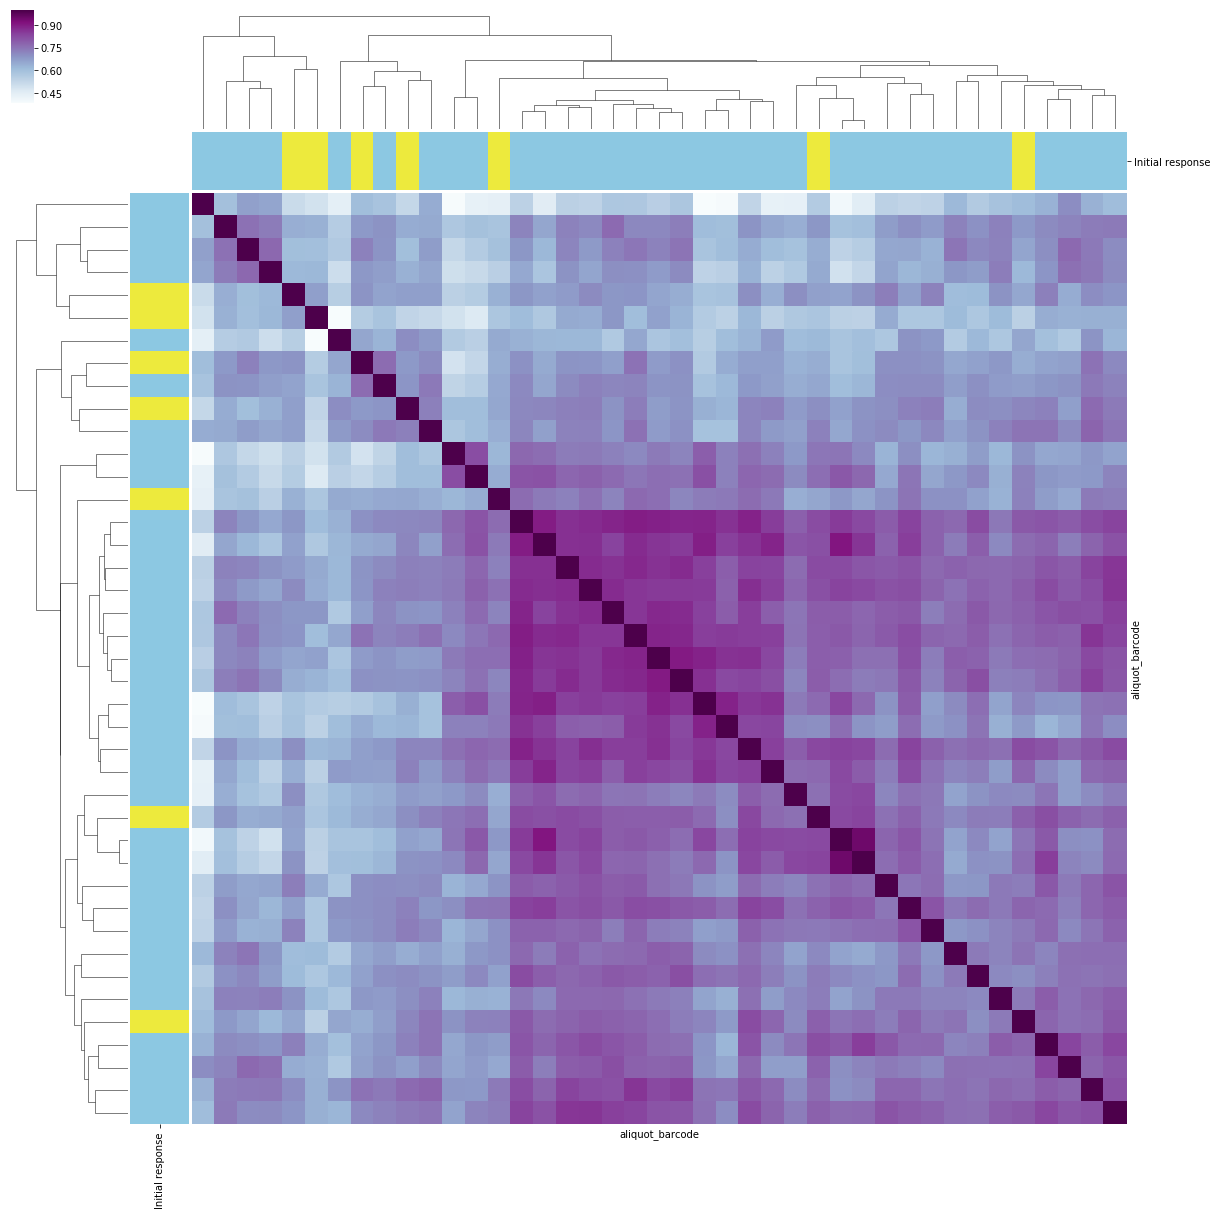

In [13]:
g4 = sns.clustermap(data=meth_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

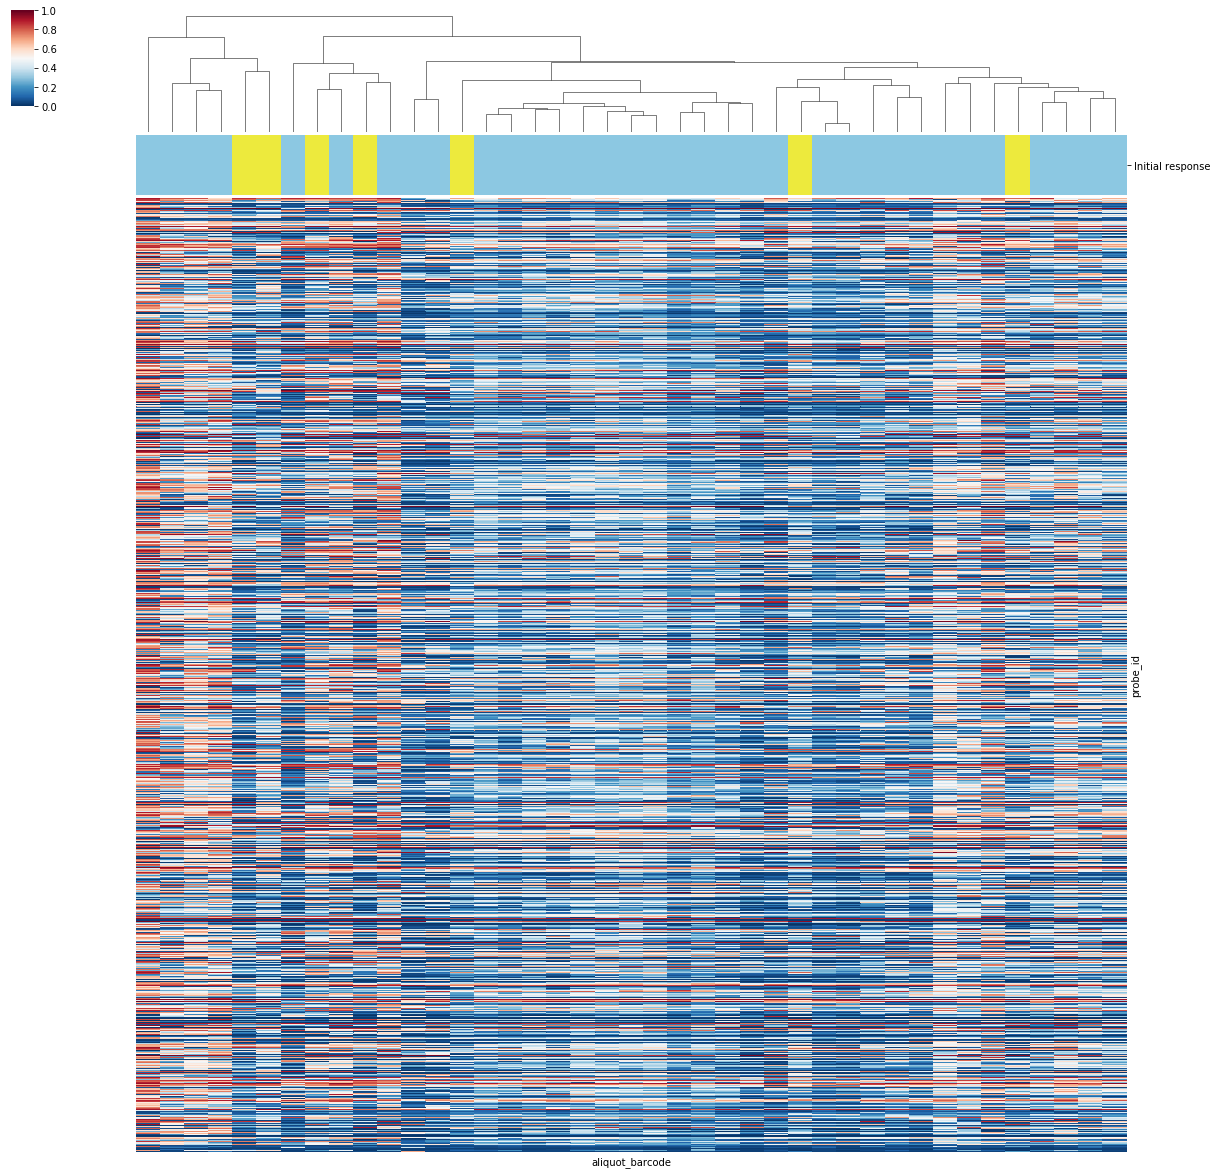

In [14]:
g5 = sns.clustermap(data=meth_matrix, col_linkage=linkage, row_cluster = False,
                   col_colors = color_matrix,
                   cmap="RdBu_r", vmin=0, vmax=1, figsize=(20,21), 
                   xticklabels=False, yticklabels=False)

In [15]:
g4.savefig("./plots/cluster_meth.hormone.excl_norm.init_res.corrdata.png")
g5.savefig("./plots/cluster_meth.hormone.excl_norm.init_res.methdata.png")

## Recurrence status

In [16]:
recur = hormone_meth_bigtable.loc[(hormone_meth_bigtable['sample_type'] == 1) & 
                                  (hormone_meth_bigtable['recurrence_status'] != 'Unknown') & 
                                  (hormone_meth_bigtable['recurrence_status'].isna() == False)]
meth_matrix = recur.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 38)


aliquot_barcode,TCGA-A2-A0CK-01A-11D-A22B-05,TCGA-A2-A0SV-01A-11D-A10P-05,TCGA-A2-A0SW-01A-11D-A10P-05,TCGA-A2-A0YC-01A-11D-A10A-05,TCGA-A2-A25B-01A-11D-A16A-05,TCGA-A2-A25E-01A-11D-A16A-05,TCGA-A7-A13E-01A-11D-A12R-05,TCGA-A7-A13G-01A-11D-A13K-05,TCGA-A7-A13G-01B-04D-A22R-05,TCGA-A7-A13H-01A-11D-A22B-05,...,TCGA-E9-A1N6-01A-11D-A145-05,TCGA-E9-A1NF-01A-11D-A14H-05,TCGA-EW-A1P0-01A-11D-A145-05,TCGA-GM-A2D9-01A-11D-A18O-05,TCGA-GM-A2DA-01A-11D-A18O-05,TCGA-GM-A2DC-01A-11D-A18O-05,TCGA-GM-A2DM-01A-11D-A17Z-05,TCGA-GM-A2DN-01A-11D-A17Z-05,TCGA-LL-A73Z-01A-11D-A32T-05,TCGA-LQ-A4E4-01A-11D-A268-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.45,0.16,0.18,0.56,0.46,0.59,0.49,0.51,0.51,0.35,...,0.38,0.21,0.58,0.46,0.22,0.68,0.19,0.40,0.32,0.71
cg00008036,0.35,0.23,0.25,0.37,0.37,0.18,0.16,0.13,0.11,0.40,...,0.36,0.37,0.48,0.32,0.14,0.35,0.11,0.46,0.09,0.14
cg00024494,0.76,0.63,0.50,0.71,0.88,0.83,0.78,0.89,0.88,0.72,...,0.79,0.86,0.56,0.84,0.70,0.84,0.81,0.53,0.62,0.90
cg00035316,0.71,0.59,0.50,0.44,0.76,0.35,0.82,0.63,0.56,0.50,...,0.53,0.67,0.83,0.71,0.48,0.75,0.67,0.40,0.44,0.87
cg00040588,0.30,0.33,0.23,0.52,0.27,0.33,0.22,0.19,0.19,0.45,...,0.27,0.45,0.14,0.63,0.24,0.26,0.43,0.34,0.78,0.27


In [17]:
color_matrix = pd.DataFrame()
df = recur.drop_duplicates(subset="aliquot_barcode")

print(df['recurrence_status'].unique())

['Occured' 'Low risk']


In [18]:
c = dict(zip(df['recurrence_status'].unique(), ["#ff7e63", "#aee851"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Recurrence status
aliquot_barcode,
TCGA-A8-A08O-01A-21D-A10P-05,#ff7e63
TCGA-A2-A0YC-01A-11D-A10A-05,#ff7e63
TCGA-A7-A13E-01A-11D-A12R-05,#ff7e63
TCGA-A7-A13G-01A-11D-A13K-05,#ff7e63
TCGA-GM-A2DC-01A-11D-A18O-05,#aee851


In [19]:
distance = scipy.spatial.distance.squareform(1-meth_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

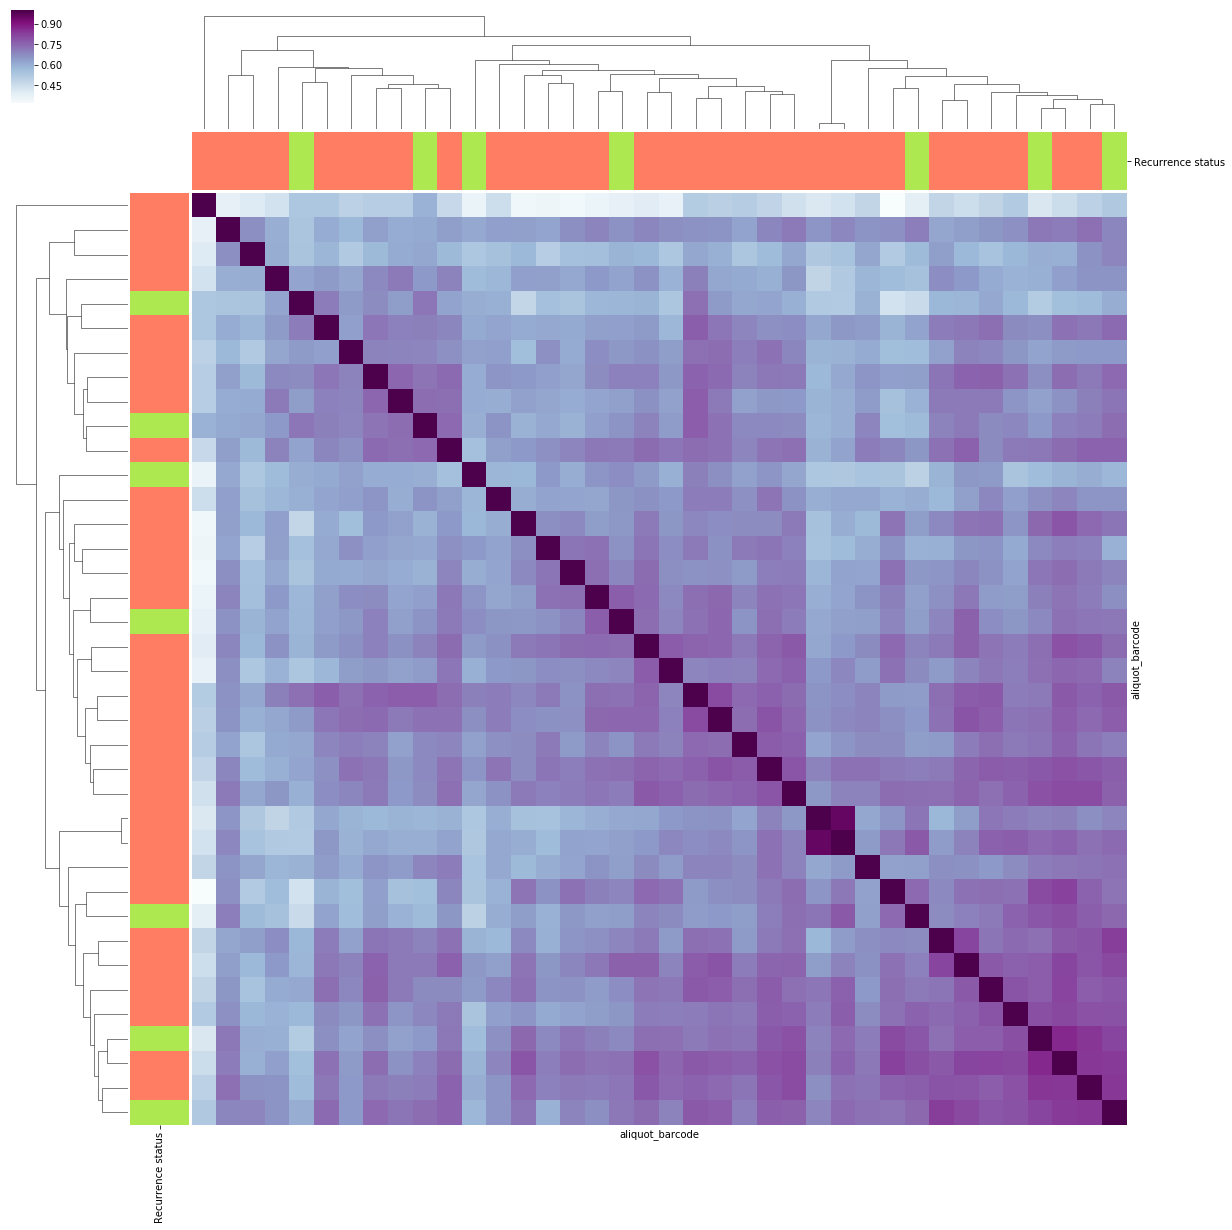

In [20]:
g6 = sns.clustermap(data=meth_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmax=1, figsize=(20,20.5), 
                   xticklabels=False, yticklabels=False)

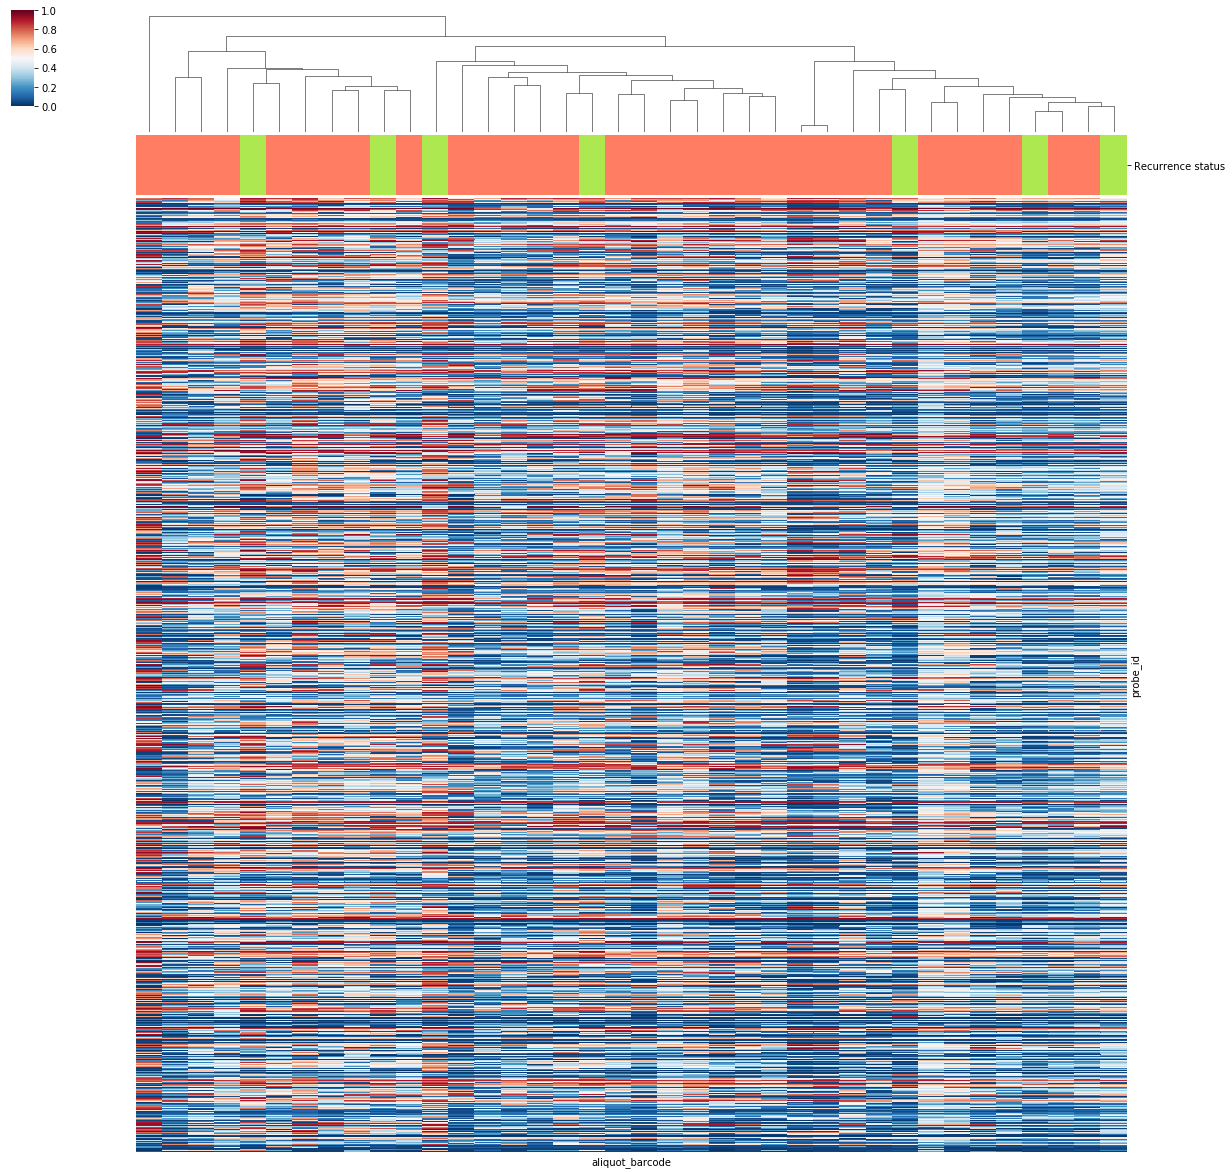

In [21]:
g7 = sns.clustermap(data=meth_matrix, col_linkage=linkage, row_cluster = False,
                   col_colors = color_matrix,
                   cmap="RdBu_r", vmin=0, vmax=1, figsize=(20,21), 
                   xticklabels=False, yticklabels=False)

In [22]:
g6.savefig("./plots/cluster_meth.hormone.excl_norm.recur.corrdata.png")
g7.savefig("./plots/cluster_meth.hormone.excl_norm.recur.methdata.png")

# Normal tissues only

In [21]:
only_normal = hormone_meth_bigtable.loc[hormone_meth_bigtable['sample_type'] == 11]
meth_matrix = only_normal.pivot(index='probe_id', columns='aliquot_barcode', values='beta_value')

print(meth_matrix.shape)
meth_matrix.head()

(1605, 35)


aliquot_barcode,TCGA-A7-A0D9-11A-53D-A10Q-05,TCGA-A7-A0DB-11A-33D-A093-05,TCGA-A7-A0DC-11A-41D-A10Q-05,TCGA-A7-A13E-11A-61D-A12R-05,TCGA-A7-A13F-11A-42D-A12R-05,TCGA-A7-A13G-11A-51D-A13T-05,TCGA-AC-A2FB-11A-13D-A17F-05,TCGA-AC-A2FF-11A-13D-A17F-05,TCGA-AC-A2FG-11A-22D-A17F-05,TCGA-BH-A0AY-11A-23D-A10Q-05,...,TCGA-E2-A1BC-11A-32D-A12R-05,TCGA-E2-A1IF-11A-22D-A145-05,TCGA-E2-A1IO-11A-21D-A145-05,TCGA-E9-A1N4-11A-33D-A14N-05,TCGA-E9-A1N5-11A-41D-A14H-05,TCGA-E9-A1N6-11A-32D-A145-05,TCGA-E9-A1NA-11A-33D-A145-05,TCGA-E9-A1NE-11A-43D-A14N-05,TCGA-E9-A1NF-11A-73D-A14H-05,TCGA-E9-A1NG-11A-52D-A14N-05
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00000321,0.21,0.25,0.26,0.21,0.26,0.28,0.27,0.30,0.29,0.23,...,0.24,0.23,0.21,0.25,0.27,0.25,0.29,0.20,0.23,0.24
cg00008036,0.07,0.09,0.10,0.09,0.11,0.09,0.19,0.12,0.15,0.13,...,0.07,0.14,0.13,0.10,0.14,0.13,0.16,0.08,0.12,0.10
cg00024494,0.50,0.59,0.83,0.57,0.70,0.61,0.67,0.75,0.70,0.78,...,0.72,0.71,0.60,0.83,0.72,0.69,0.62,0.72,0.62,0.55
cg00035316,0.11,0.13,0.31,0.17,0.21,0.19,0.33,0.21,0.45,0.23,...,0.17,0.31,0.18,0.34,0.34,0.23,0.26,0.16,0.20,0.18
cg00040588,0.43,0.46,0.53,0.46,0.41,0.39,0.48,0.37,0.39,0.57,...,0.46,0.38,0.45,0.38,0.40,0.42,0.48,0.43,0.40,0.38


In [22]:
meth_matrix.corr().min().min()

0.7220447239236786

In [23]:
color_matrix = pd.DataFrame()
df = only_normal.drop_duplicates(subset="aliquot_barcode")

c = dict(zip(df['initial_response'].unique(), ["#ffffff", "#edea3d", "#8cc8e2"]))
color_matrix['Initial response'] = df['initial_response'].map(c)

c = dict(zip(df['recurrence_status'].unique(), ["#ffffff", "#ff7e63", "#aee851", "#ffffff"]))
color_matrix['Recurrence status'] = df['recurrence_status'].map(c)

color_matrix.set_index(df['aliquot_barcode'], inplace=True)
color_matrix.head()

,Initial response,Recurrence status
aliquot_barcode,,
TCGA-BH-A0C0-11A-21D-A10Q-05,#ffffff,#ffffff
TCGA-A7-A13G-11A-51D-A13T-05,#ffffff,#ff7e63
TCGA-E9-A1NA-11A-33D-A145-05,#ffffff,#ffffff
TCGA-E9-A1N6-11A-32D-A145-05,#edea3d,#ff7e63
TCGA-E2-A1IO-11A-21D-A145-05,#ffffff,#ffffff


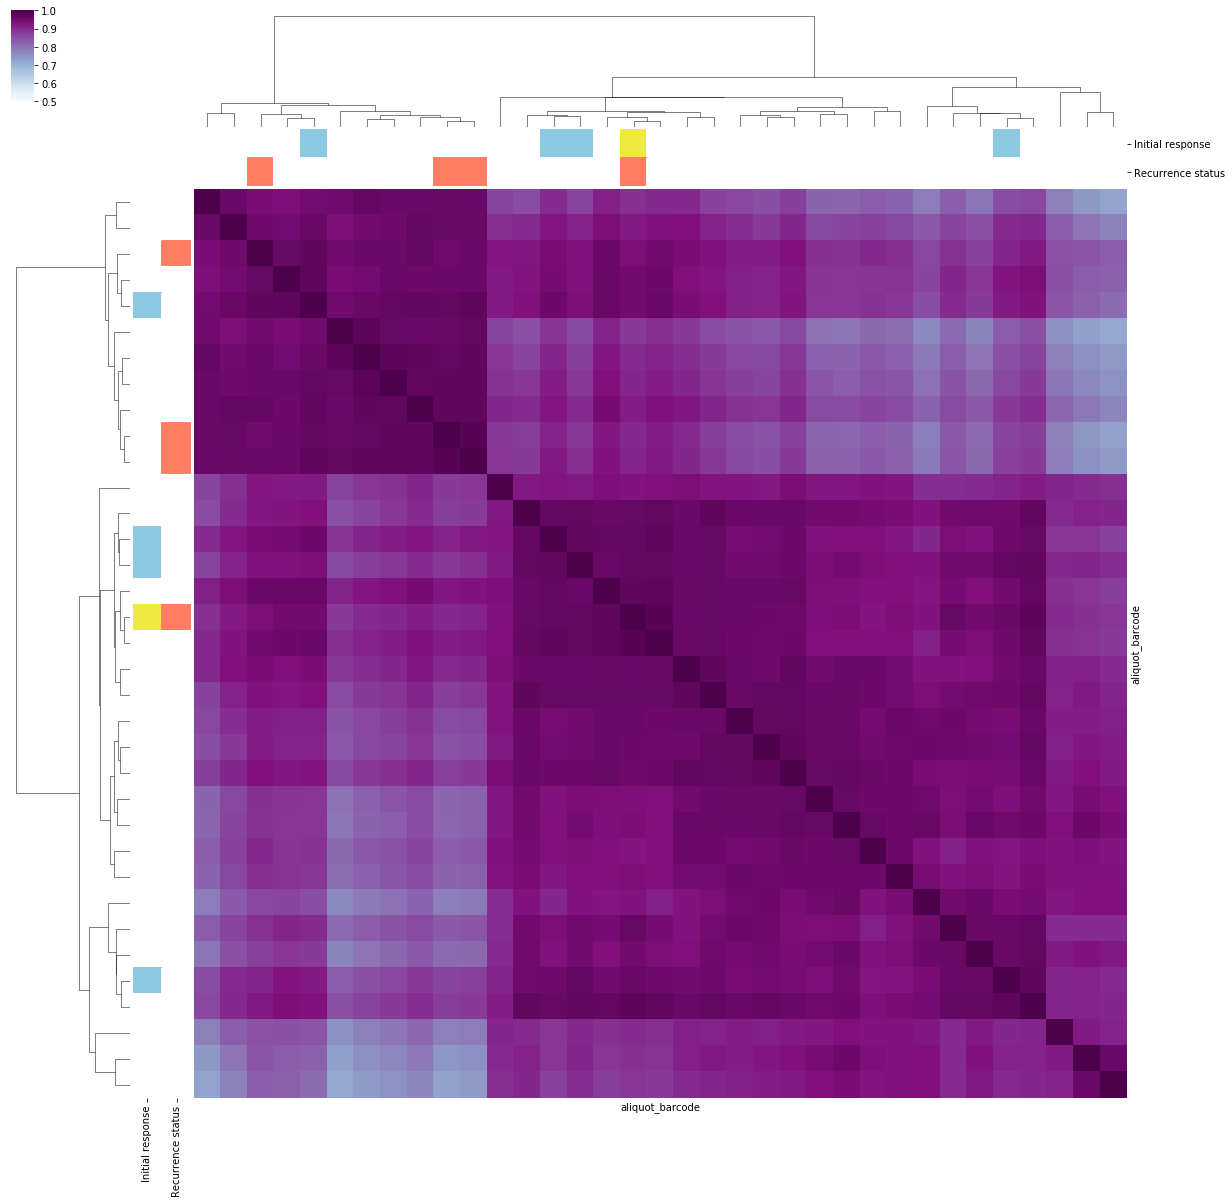

In [24]:
distance = scipy.spatial.distance.squareform(1-meth_matrix.corr())
linkage = scipy.cluster.hierarchy.linkage(distance, method='complete')

gg = sns.clustermap(data=meth_matrix.corr(), col_linkage=linkage, row_linkage=linkage,
                   row_colors=color_matrix, col_colors = color_matrix,
                   cmap="BuPu", vmin=0.5, vmax=1, figsize=(20,20), 
                   xticklabels=False, yticklabels=False)